In [9]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from sklearn.metrics import mean_squared_error

/Users/nicholasmodar/anaconda3/envs/pywork/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [3]:
def parser(x):
    return datetime.strptime(x, '%Y-%d-%m')
series = read_csv('/Users/nicholasmodar/Box/Nick/Sp2020/EXCO301/shamp_data.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

month 
2020-01-01    266.0
2020-01-02    145.9
2020-01-03    183.1
2020-01-04    119.3
2020-01-05    180.3
Name: sales, dtype: float64


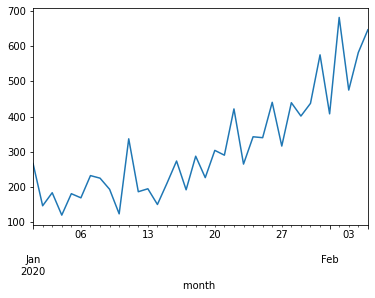

In [4]:
print(series.head())
series.plot()
pyplot.show()

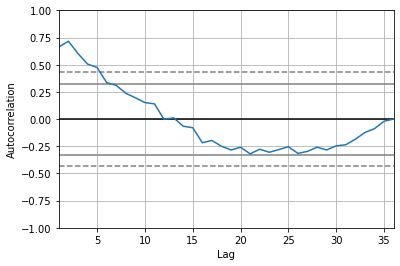

In [5]:
autocorrelation_plot(series)
pyplot.show()

/Users/nicholasmodar/anaconda3/envs/pywork/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/nicholasmodar/anaconda3/envs/pywork/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.160
Method:                       css-mle   S.D. of innovations             64.223
Date:                Tue, 12 May 2020   AIC                            406.320
Time:                        11:32:06   BIC                            417.208
Sample:                    01-02-2020   HQIC                           410.079
                         - 02-05-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0721      3.657      3.301      0.001       4.904      19.241
ar.L1.D.sales    -1.1075      0.183     -6.060      0.000      -1.466      -0.749
ar.L2.D.sales    -0.6186      0.282     

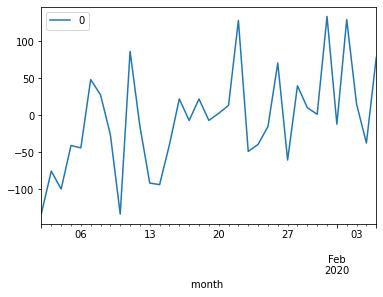

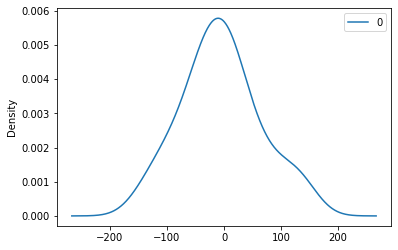

                0
count   35.000000
mean    -5.486286
std     68.116404
min   -133.345998
25%    -42.418482
50%     -7.099031
75%     24.765992
max    133.235810


In [8]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [13]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

SyntaxError: invalid syntax (<ipython-input-13-99d8f728d25f>, line 7)

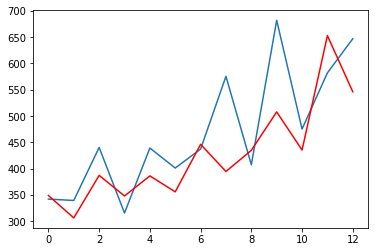

In [12]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()